In [ ]:

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext autotime

time: 75.6 µs (started: 2022-07-07 10:02:26 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 27.5 s (started: 2022-07-07 10:02:26 +00:00)


In [ ]:
# !unzip "/content/drive/MyDrive/Thesis_Space/covid-19-chest-xray-segmentations-dataset-master.zip" -d "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset"

time: 1.22 ms (started: 2022-07-07 10:02:54 +00:00)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/structure.csv")
df

,#,Taxonomy,Class,Template Name,File Folder,Filename,Image,Tag,Mask,Resolution,...,Left,Width,Height,Points,Text Annotation,Minimal Top,Minimal Left,Minimal Width,Minimal Height,Attributes
0,1,NaN,COVID-19 Airways,Airways,NaN,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,images/0fc7f55c1dac1528b4459ef3adbae236acab1fe...,tags/0fc7f55c1dac1528b4459ef3adbae236acab1fee_...,masks/0fc7f55c1dac1528b4459ef3adbae236acab1fee...,943x751,...,336,295,410,NaN,undefined,0.0,336.0,295.0,410.0,NaN
1,2,NaN,COVID-19 Cardiomediastinum,Cardiomediastinum,NaN,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,images/0fc7f55c1dac1528b4459ef3adbae236acab1fe...,tags/0fc7f55c1dac1528b4459ef3adbae236acab1fee_...,masks/0fc7f55c1dac1528b4459ef3adbae236acab1fee...,943x751,...,299,506,532,NaN,undefined,200.0,299.0,506.0,532.0,NaN
2,3,NaN,COVID-19 Ground Glass Opacities,Ground Glass Opacities,NaN,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,images/0fc7f55c1dac1528b4459ef3adbae236acab1fe...,tags/0fc7f55c1dac1528b4459ef3adbae236acab1fee_...,masks/0fc7f55c1dac1528b4459ef3adbae236acab1fee...,943x751,...,47,851,627,NaN,undefined,38.0,47.0,851.0,627.0,NaN
3,4,NaN,COVID-19 Right Lung,Right Lung,NaN,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,images/0fc7f55c1dac1528b4459ef3adbae236acab1fe...,tags/0fc7f55c1dac1528b4459ef3adbae236acab1fee_...,masks/0fc7f55c1dac1528b4459ef3adbae236acab1fee...,943x751,...,37,400,657,NaN,undefined,21.0,37.0,400.0,657.0,NaN
4,5,Class:Left Lung,COVID-19 Left Lung,Left Lung,NaN,X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg,images/0fc7f55c1dac1528b4459ef3adbae236acab1fe...,tags/0fc7f55c1dac1528b4459ef3adbae236acab1fee_...,masks/0fc7f55c1dac1528b4459ef3adbae236acab1fee...,943x751,...,516,389,751,NaN,undefined,0.0,516.0,389.0,751.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,NaN,COVID-19 Airways,Airways,NaN,9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg,images/2c73d59fa88c638b7ccb524f16b60c3616d0ac2...,tags/2c73d59fa88c638b7ccb524f16b60c3616d0ac26_...,masks/2c73d59fa88c638b7ccb524f16b60c3616d0ac26...,651x659,...,298,90,280,NaN,undefined,0.0,298.0,90.0,280.0,NaN
598,599,NaN,COVID-19 Cardiomediastinum,Cardiomediastinum,NaN,9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg,images/2c73d59fa88c638b7ccb524f16b60c3616d0ac2...,tags/2c73d59fa88c638b7ccb524f16b60c3616d0ac26_...,masks/2c73d59fa88c638b7ccb524f16b60c3616d0ac26...,651x659,...,258,246,285,NaN,undefined,184.0,258.0,246.0,285.0,NaN
599,600,NaN,COVID-19 Ground Glass Opacities,Ground Glass Opacities,NaN,9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg,images/2c73d59fa88c638b7ccb524f16b60c3616d0ac2...,tags/2c73d59fa88c638b7ccb524f16b60c3616d0ac26_...,masks/2c73d59fa88c638b7ccb524f16b60c3616d0ac26...,651x659,...,453,155,100,NaN,undefined,329.0,453.0,155.0,100.0,NaN
600,601,Class:Left Lung,COVID-19 Left Lung,Left Lung,NaN,9C34AF49-E589-44D5-92D3-168B3B04E4A6.jpeg,images/2c73d59fa88c638b7ccb524f16b60c3616d0ac2...,tags/2c73d59fa88c638b7ccb524f16b60c3616d0ac26_...,masks/2c73d59fa88c638b7ccb524f16b60c3616d0ac26...,651x659,...,369,249,387,NaN,undefined,78.0,369.0,249.0,387.0,NaN


time: 4.44 s (started: 2022-07-07 10:02:54 +00:00)


In [ ]:
df['Template Name'].unique()

array(['Airways', 'Cardiomediastinum', 'Ground Glass Opacities',
       'Right Lung', 'Left Lung', 'Consolidation', 'Pleural Effusion',
       'Central Venous Line', 'Endotracheal Tube', 'Tubings',
       'Monitoring Probes', 'Nosogastric Tube', 'Pneumothorax'],
      dtype=object)

time: 8.18 ms (started: 2022-07-07 10:02:58 +00:00)


In [ ]:
ll = df[df['Template Name']=='Left Lung']
ll.nunique(dropna='True')

#                  99
Taxonomy            1
Class               1
Template Name       1
File Folder         0
Filename           99
Image              99
Tag                99
Mask               99
Resolution         94
Top                74
Left               96
Width              93
Height             97
Points              0
Text Annotation     1
Minimal Top        74
Minimal Left       96
Minimal Width      93
Minimal Height     97
Attributes          0
dtype: int64

time: 16.1 ms (started: 2022-07-07 10:02:58 +00:00)


# Trying mask resizing for one image

In [ ]:
# big = cv2.imread('/content/ryct.2020200034.fig5-day4.jpeg')
# # big = cv2.resize(big,(1600,1600))

# small = cv2.imread('/content/c7370a836eed5a487d67b7ca1bc27d238006b0ec_PckWTkH9GoiqmNLhY.png')
# # small = cv2.resize(small,(800,800))

time: 1.2 ms (started: 2022-07-07 10:02:58 +00:00)


In [ ]:

# big.shape

time: 414 µs (started: 2022-07-06 07:56:41 +00:00)


In [ ]:
# small.shape

time: 1.01 ms (started: 2022-07-06 07:56:41 +00:00)


In [ ]:
# new = np.zeros((big.shape[0],big.shape[1],3))
# x_offset=638
# y_offset=80
# new[y_offset:y_offset+small.shape[0], x_offset:x_offset+small.shape[1]] = small
# # replace[100:400,100:400] = small
# cv2_imshow(cv2.resize(new,(300,300)))
# cv2_imshow(cv2.resize(big,(300,300)))

time: 1.19 ms (started: 2022-07-06 07:56:41 +00:00)


# Mask resizing for all Images

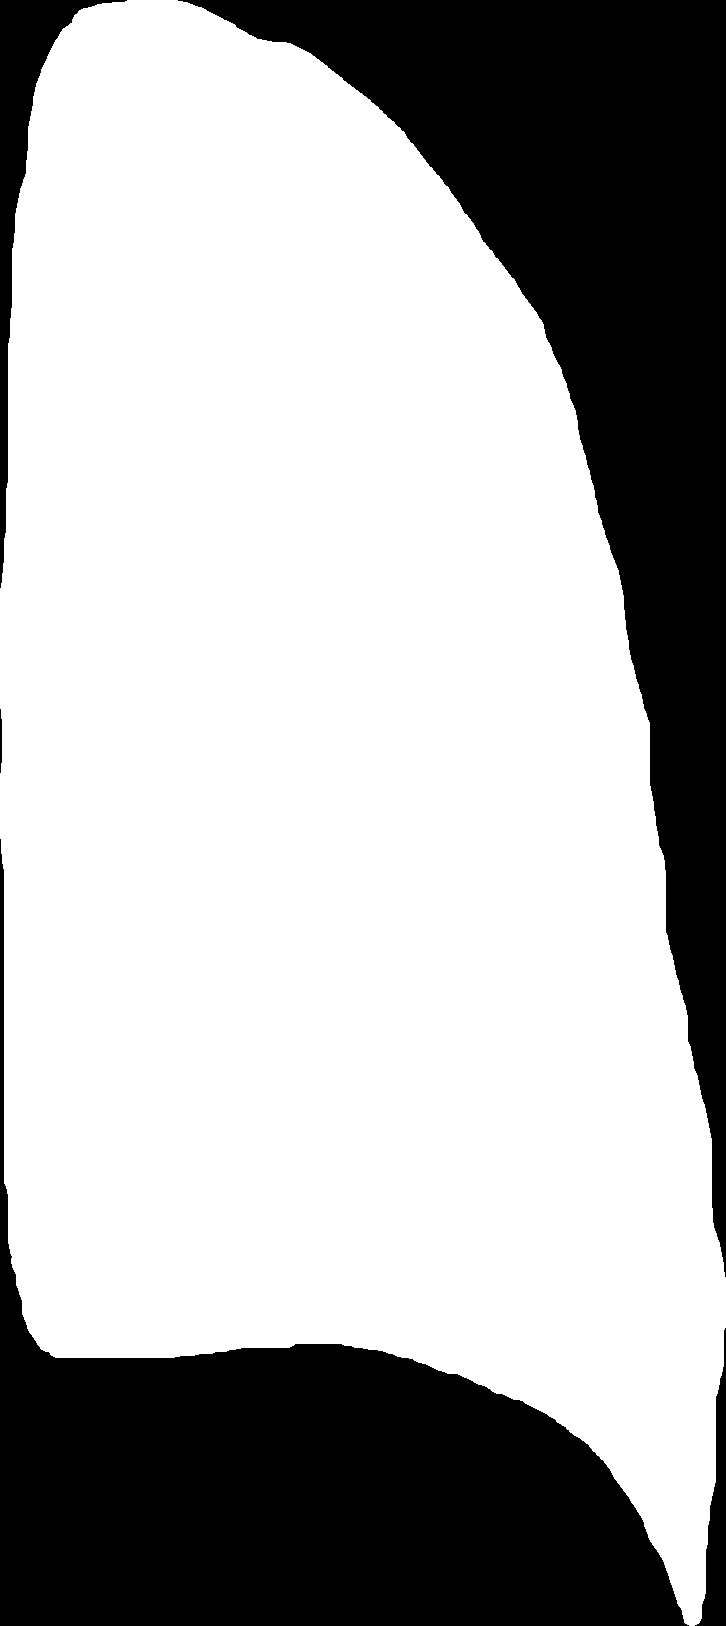

(1626, 726)
[False  True]


In [ ]:
ll_images = []
ll_masks = []
for i in ll['Filename']:
  img = cv2.imread("/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/images/"+i)#.astype(np.float32)
  img
  ll_images.append(img)
  new_img = np.zeros((img.shape[0],img.shape[1]))
  ll_masks.append(new_img)

  
index=0
for i in range(len(ll['Tag'])):
  row = ll.iloc[i]
  mask_name = row['Tag'][5:]
  t = row['Top'] 
  l = row['Left']
  msk = cv2.imread("/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/masks/"+mask_name,0)#.astype(np.float32)
  msk = msk/255
  msk = msk != 0
  if(index==11):
    cv2_imshow(msk*255)
    print(msk.shape)
    print(np.unique(msk))
  # gray_msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
  # if(index==11):
    # cv2_imshow(gray_msk*255)
  ll_masks[index][t:t+msk.shape[0],l:l+msk.shape[1]]=msk
  index+=1

In [ ]:
cv2_imshow(ll_images[0])

In [ ]:
ll_masks[0].shape

In [ ]:
x = ll_masks[0].shape[0]
y= ll_masks[0].shape[1]
print(x,y)

In [ ]:
t = ll_masks[0][:,:] 
cv2_imshow(t*255)

In [ ]:
t = ll_masks[0][:,x//2:] 
cv2_imshow(t*255)

In [ ]:
ll_images_half =[]
ll_masks_half = []

for i in ll_images:
  x = i.shape[0]
  y = i.shape[1]
  temp_i = i[:,x//2:]
  ll_images_half.append(temp_i)

for m in ll_masks:
  p = m.shape[0]
  q = m.shape[1]
  temp_m = m[:,p//2:]
  ll_masks_half.append(temp_m*255)

time: 667 ms (started: 2022-07-07 10:51:16 +00:00)


In [ ]:
ll_masks_half[0].shape

(751, 568)

time: 6.62 ms (started: 2022-07-07 10:51:17 +00:00)


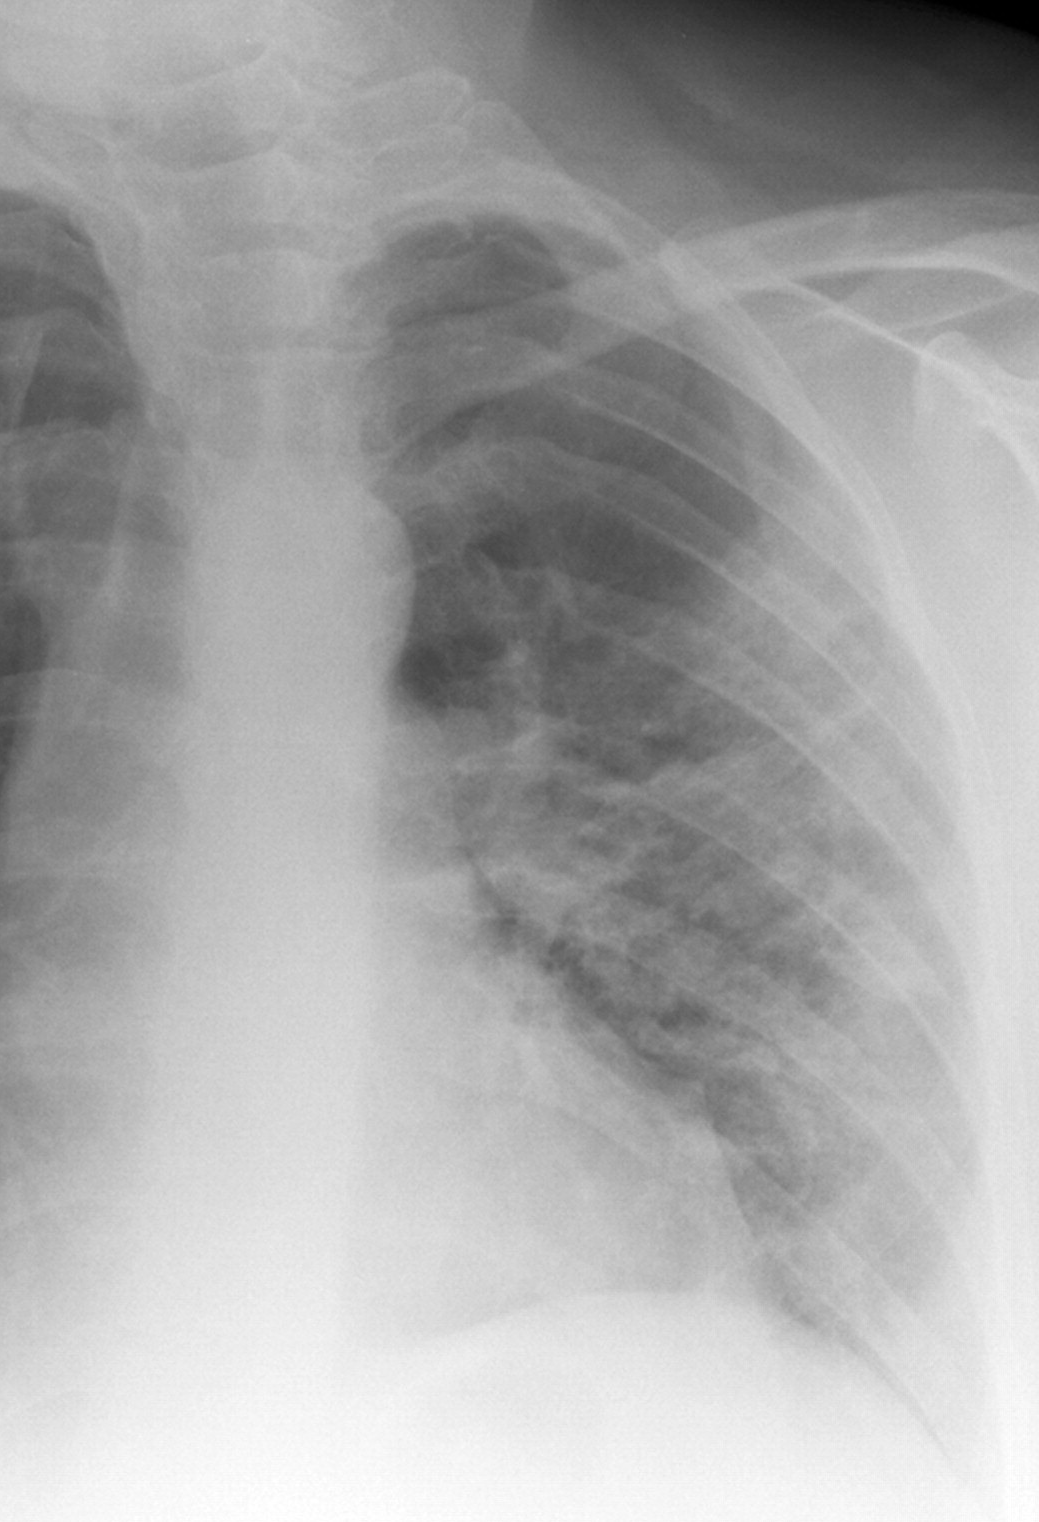

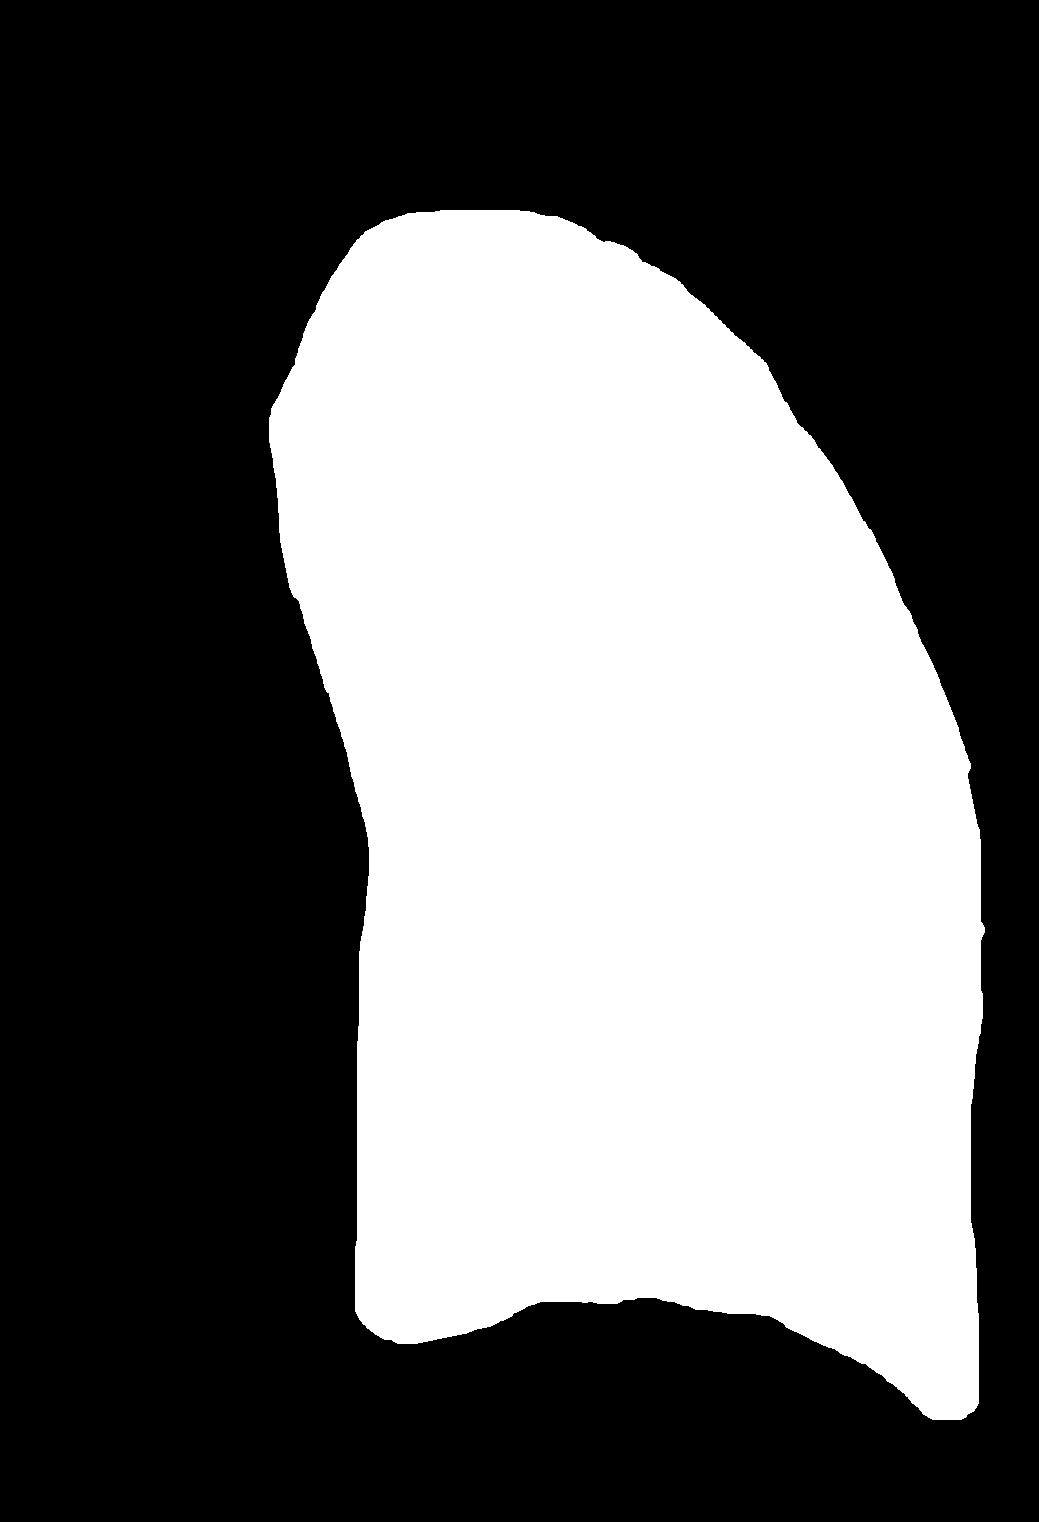

time: 459 ms (started: 2022-07-07 10:53:38 +00:00)


In [ ]:
cv2_imshow(ll_images_half[2])
cv2_imshow(ll_masks_half[2])

# Smart Resize

In [ ]:
# # import tensorflow as tf
# from tensorflow.keras.preprocessing.image import smart_resize
# size = (200, 200)
# # ds = ll_images
# data_tensor = tf.ragged.constant(ll_images)
# ds = tf.data.Dataset.from_tensor_slices(data_tensor)
# ds = ds.map(lambda img: smart_resize(img, size))

time: 1.35 ms (started: 2022-07-07 10:53:38 +00:00)


In [ ]:

ll_masks[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

time: 12.5 ms (started: 2022-07-07 10:53:38 +00:00)


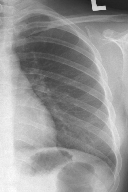

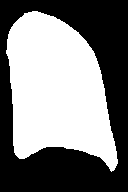

time: 24.4 ms (started: 2022-07-07 10:53:38 +00:00)


In [ ]:
# cv2_imshow(cv2.resize(ll_images[7],(300,300)))
# cv2_imshow(cv2.resize(ll_masks[7]*255,(300,300)))
cv2_imshow(cv2.resize(ll_images_half[7],(300,300)))
cv2_imshow(cv2.resize(ll_masks_half[7]*255,(300,300)))

In [ ]:
!python -m pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 2.77 s (started: 2022-07-07 10:53:38 +00:00)


In [ ]:
!pip install -U Pillow

In [ ]:
from PIL import Image as im

time: 1.66 ms (started: 2022-07-06 19:15:04 +00:00)


In [ ]:
# im.thumbnail(size,Image.ANTIALIAS)

In [ ]:
for i in range(len(ll_images)):
  ll_images[i] = cv2.resize(ll_images[i],(128,128),interpolation = cv2.INTER_NEAREST)



for i in range(len(ll_masks)):
  ll_masks[i] = cv2.resize(ll_masks[i],(128,128),interpolation = cv2.INTER_NEAREST)

time: 8.41 ms (started: 2022-07-06 08:08:31 +00:00)


In [ ]:
len(ll_masks)

99

time: 4.85 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
ll_images_np = np.array(ll_images)#, dtype=np.float)
ll_masks_np = np.array(ll_masks)#, dtype=np.float)

time: 10.4 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
ll_images_np_z = (ll_images_np - np.mean(ll_images_np))/np.std(ll_images_np)

time: 39.3 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:

array_sizes = set(map(len, ll_images_np_z))

time: 743 µs (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
array_sizes

{128}

time: 4 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
np.unique(ll_masks_np[0])

array([0., 1.])

time: 4.83 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
def z_rev(img):
  return img*np.std(ll_images_np)+np.mean(ll_images_np)

time: 1.03 ms (started: 2022-07-06 08:08:32 +00:00)


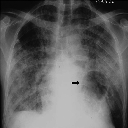

time: 44.3 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
cv2_imshow(z_rev(ll_images_np_z[0]))#*np.std(ll_images_np)+np.mean(ll_images_np))

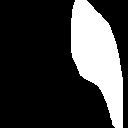

time: 6.65 ms (started: 2022-07-06 08:08:32 +00:00)


In [ ]:
cv2_imshow(ll_masks_np[0]*255)

In [ ]:
# for i in range(ll_images_np.shape[0]):
#   ll_images_np[i] = cv2.resize(ll_images_np[i],(128,128),interpolation = cv2.INTER_NEAREST)



# for i in range(ll_masks_np.shape[0]):
#   ll_masks_np[i] = cv2.resize(ll_masks_np[i],(128,128),interpolation = cv2.INTER_NEAREST)
#   # for j in ll_masks_np[i]:
#   #   ll_masks_np[i] = 1 if ll_masks_np[i] else 0

time: 1.6 ms (started: 2022-07-06 08:08:32 +00:00)


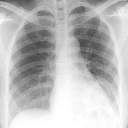

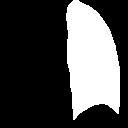

time: 35.9 ms (started: 2022-07-06 08:08:33 +00:00)


In [ ]:
cv2_imshow(z_rev(ll_images_np_z[9]))
cv2_imshow(ll_masks_np[9]*255)

In [ ]:
ll_images_np[0].shape

(128, 128, 3)

time: 4.32 ms (started: 2022-07-06 08:08:33 +00:00)


In [ ]:
ll_masks_np.shape

(99, 128, 128)

time: 4.37 ms (started: 2022-07-06 08:08:33 +00:00)


In [ ]:
from numpy import newaxis
ll_masks_np = ll_masks_np[..., newaxis]
# b = a[..., newaxis]

time: 1.34 ms (started: 2022-07-06 08:08:33 +00:00)


In [ ]:
ll_masks_np.shape

(99, 128, 128, 1)

time: 3.87 ms (started: 2022-07-06 08:08:33 +00:00)


In [ ]:
# for i in range(ll_masks_np.shape[0]):
#   ll_masks_np[i] = ll_masks_np[i].reshape(ll_masks_np.shape[1],ll_masks_np.shape[2],1)
#   ll_masks_np[i] = ll_masks_np[i].reshape(ll_masks_np.shape[1],ll_masks_np.shape[2],1)

time: 993 µs (started: 2022-07-06 08:08:34 +00:00)


In [ ]:
np.unique(ll_masks_np[0])

array([0., 1.])

time: 4.38 ms (started: 2022-07-06 08:08:34 +00:00)


# New Method Keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

time: 982 µs (started: 2022-07-06 08:08:34 +00:00)


In [ ]:
# ll_images_np=ll_images_np.reshape((ll_images_np.shape[0],1))

time: 729 µs (started: 2022-07-06 08:08:34 +00:00)


In [ ]:
ll_images_np.shape

(99, 128, 128, 3)

time: 3.82 ms (started: 2022-07-06 08:08:34 +00:00)


In [ ]:
# ll_images_np = ll_images_np/255.0

time: 728 µs (started: 2022-07-06 08:08:35 +00:00)


In [ ]:
data_gen_args = dict(rotation_range=20.)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit(ll_images_np, augment=True, seed=seed)
mask_datagen.fit(ll_masks_np, augment=True, seed=seed)

image_generator = image_datagen.flow(ll_images_np, seed=seed)
mask_generator = mask_datagen.flow(ll_masks_np, seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

# id = 0  # Use whatever method you wish for a name with no collision.
# for images, masks in train_generator:
#     for image, mask in zip(images, masks):
#         np.save('data/aug_images/images/' + str(id), image)
#         np.save('data/aug_images/masks/' + str(id), mask)
#         id += 1



# Model fit later



# model.fit_generator(
#     train_generator,
#     steps_per_epoch=2000,
#     epochs=50)

time: 428 ms (started: 2022-07-06 08:08:35 +00:00)


In [ ]:
# data_gen_args_val = dict(rotation_range=20.)
# image_datagen_val = ImageDataGenerator(**data_gen_args)
# mask_datagen_val = ImageDataGenerator(**data_gen_args)

# # Provide the same seed and keyword arguments to the fit and flow methods
# seed_val = 2
# image_datagen_val.fit(ll_images_np, augment=True, seed=seed_val)
# mask_datagen_val.fit(ll_masks_np, augment=True, seed=seed_val)

# image_generator_val = image_datagen.flow(ll_images_np, seed=seed_val)
# mask_generator_val = mask_datagen.flow(ll_masks_np, seed=seed_val)

# # combine generators into one which yields image and masks
# val_generator = zip(image_generator_val, mask_generator_val)


# # Model fit later



# # model.fit_generator(
# #     train_generator,
# #     steps_per_epoch=2000,
# #     epochs=50)

time: 3.48 ms (started: 2022-07-06 08:08:35 +00:00)


In [ ]:

# x_val = []
# y_val = []
# id = 0  # Use whatever method you wish for a name with no collision.
# for images, masks in val_generator:
#     for image, mask in zip(images, masks):
#       if id<201:
#         x_val.append(image)
#         y_val.append(mask)
#         id += 1

# x_val = np.array(x_val)
# y_val = np.array(y_val)

time: 2.4 ms (started: 2022-07-06 08:08:36 +00:00)


In [ ]:
type(image_generator)

keras.preprocessing.image.NumpyArrayIterator

time: 3.58 ms (started: 2022-07-06 08:08:36 +00:00)


(128, 128, 3)
(128, 128)


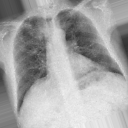

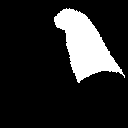

time: 150 ms (started: 2022-07-06 08:08:36 +00:00)


In [ ]:

# convert to unsigned integers for plotting
image = next(image_generator)[0].astype('uint8')
mask = next(mask_generator)[0].astype('uint8')

# changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
image = np.squeeze(image)
mask = np.squeeze(mask)
print(image.shape)
print(mask.shape)

# plot raw pixel data
cv2_imshow(image)
cv2_imshow(mask*255)
# np.unique(image)

In [ ]:
type(ll_images_np)

numpy.ndarray

time: 7.23 ms (started: 2022-07-06 08:08:36 +00:00)


In [ ]:
ll_images_np[1].shape

(128, 128, 3)

time: 2.62 ms (started: 2022-07-06 08:08:37 +00:00)


# Old Albumentation library implementation

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt
# from skimage.transform import AffineTransform, warp
# from skimage import io, img_as_ubyte
# import random
# import os
# from scipy.ndimage import rotate

# import albumentations as A


time: 1.4 ms (started: 2022-07-05 11:32:55 +00:00)


In [ ]:
#Double Comment

# # import os
# path = "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/augmented/"
# # # path = "/content/Dataset/covid-19-chest-xray-segmentations-dataset-master/augmented/"
# # # os.mkdir(path)
# # os.chdir(path)
# # os.mkdir(path+"/aug_images/")
# # os.mkdir(path+"/aug_masks/")
 
# dir = path+"/aug_images/"
# for f in os.listdir(dir):
#     os.remove(os.path.join(dir, f))

# dir = path+"/aug_masks/"
# for f in os.listdir(dir):
#     os.remove(os.path.join(dir, f))

time: 2.75 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# path = "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/augmented/"
# img_augmented_path =path+"/aug_images/"
# msk_augmented_path = path+"/aug_masks/"

# for f in os.listdir(img_augmented_path):
#     os.remove(os.path.join(img_augmented_path, f))

# for f in os.listdir(msk_augmented_path):
#     os.remove(os.path.join(msk_augmented_path, f))

time: 2.16 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# aug = A.Compose([
#     A.VerticalFlip(p=0.5),              
#     A.RandomRotate90(p=0.5),
#     A.HorizontalFlip(p=1),
#     A.Transpose(p=1),
#     #A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
#     A.GridDistortion(p=1)
#     ]
# )

time: 1.89 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# images_to_generate=500
# i=1   # variable to iterate till images_to_generate
# path = "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/Dataset/covid-19-chest-xray-segmentations-dataset-master/augmented/"
# img_augmented_path =path+"/aug_images/"
# msk_augmented_path = path+"/aug_masks/"
# while i<=images_to_generate: 
#     number = random.randint(0, len(ll_images_np)-1)  #PIck a number to select an image & mask
#     # print("**********************************************")
#     img = ll_images_np[number]
#     img = img*255
#     img = img.astype(np.uint8)
#     # cv2_imshow(img)
#     msk = ll_masks_np[number]
#     msk = msk*255
#     msk = msk.astype(np.uint8)
#     # cv2_imshow(msk)
#     # print("----------------------")
    
#     # print(number)
#     # print(image, mask)
#     #image=random.choice(images) #Randomly select an image name
#     # original_image = cv2.imread(image)
#     # original_mask = cv2.imread(mask)
    
#     augmented = aug(image=img, mask=msk)
#     transformed_image = augmented['image']
#     transformed_mask = augmented['mask']
#     # cv2_imshow(transformed_image)
#     # cv2_imshow(transformed_mask)
#     # print("**********************************************")
        
    
#     new_image_path= "%s/augmented_image_%s.png" %(img_augmented_path, i)
#     new_mask_path = "%s/augmented_mask_%s.png" %(msk_augmented_path, i)
#     io.imsave(new_image_path, transformed_image)
#     io.imsave(new_mask_path, transformed_mask)
#     i =i+1

time: 8.9 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# img = cv2.imread(img_augmented_path+"/augmented_image_157.png")
# mask = cv2.imread(msk_augmented_path+"/augmented_mask_157.png")
# cv2_imshow(img)
# cv2_imshow(mask)

time: 1.11 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# import glob
# from skimage import io
# aug_ll_images=[]
# aug_ll_masks=[]


# for img in os.listdir(img_augmented_path):
#   # print(img)
#   temp = cv2.imread(img_augmented_path+'/'+img)
#   aug_ll_images.append(temp)

# for img in os.listdir(msk_augmented_path):
#   # print(img)
#   temp = cv2.imread(msk_augmented_path+'/'+img,0)
#   aug_ll_masks.append(temp)

time: 2.56 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# cv2_imshow(aug_ll_images[15])
# cv2_imshow(aug_ll_masks[15])
# print(len(aug_ll_images))
# print(len(aug_ll_masks))

time: 941 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# for i in range(len(aug_ll_images)):
#   # aug_ll_images[i] =cv2.resize(aug_ll_images[i],(512,512))
#   aug_ll_images[i] = aug_ll_images[i]/255.0
#   aug_ll_images[i] = aug_ll_images[i].astype(np.float32)

# for i in range(len(aug_ll_masks)):
#   # aug_ll_masks[i] =cv2.resize(aug_ll_masks[i],(512,512))
#   aug_ll_masks[i] = aug_ll_masks[i]/255.0
#   aug_ll_masks[i] = aug_ll_masks[i] > 0.5
#   aug_ll_masks[i] = aug_ll_masks[i].astype(np.float32)

time: 1.91 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# np.unique(aug_ll_images[1])

time: 614 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# cv2_imshow(aug_ll_images[10]*255)
# cv2_imshow(aug_ll_masks[10]*255)

time: 741 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# X = np.array(aug_ll_images)
# Y = np.array(aug_ll_masks)

time: 717 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# print(X.shape)
# print(Y.shape)

time: 672 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# print(X.shape)
# # print(Y.shape)
# Y = np.expand_dims(Y,axis=3)
# print(Y.shape)

time: 1.11 ms (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.4,random_state=42,shuffle=False)
# x_val, x_test, y_val, y_test = train_test_split(x_val,y_val,test_size=0.5,random_state=42,shuffle=False)

time: 962 µs (started: 2022-06-28 09:40:53 +00:00)


In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)
# print(x_test.shape)
# print(y_test.shape)

time: 1.09 ms (started: 2022-06-28 09:40:53 +00:00)


# Normal Code

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.metrics import Recall, Precision

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

time: 10.1 ms (started: 2022-07-06 08:08:44 +00:00)


In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

IMG_CHANNELS = 3


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
metrics = [dice_coef, iou, Recall(), Precision()]
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
!pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.3 MB/s 
time: 7.48 s (started: 2022-07-06 08:08:49 +00:00)


In [ ]:
import segmentation_models as sm
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score,dice_coef,],)

Segmentation Models: using `keras` framework.
time: 385 ms (started: 2022-07-06 08:08:56 +00:00)


In [ ]:
# history = model.fit(
#    x=x_train,
#    y=y_train,
#    batch_size=32,
#    epochs=200,
#    verbose=1,
#    validation_data=(x_val, y_val),
# )

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    validation_data = (ll_images_np, ll_masks_np), # using original dataset of 99 images for validation
    epochs=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
100/100 [==============================] - 39s 196ms/step - loss: 1.0391 - iou_score: 0.3602 - dice_coef: 0.4970 - val_loss: 0.9315 - val_iou_score: 0.3755 - val_dice_coef: 0.5445
Epoch 2/15
100/100 [==============================] - 13s 134ms/step - loss: 0.5086 - iou_score: 0.6741 - dice_coef: 0.8033 - val_loss: 0.4551 - val_iou_score: 0.7040 - val_dice_coef: 0.8253
Epoch 3/15
100/100 [==============================] - 13s 134ms/step - loss: 0.3523 - iou_score: 0.7683 - dice_coef: 0.8684 - val_loss: 0.3291 - val_iou_score: 0.7899 - val_dice_coef: 0.8822
Epoch 4/15
100/100 [==============================] - 13s 135ms/step - loss: 0.2696 - iou_score: 0.8297 - dice_coef: 0.9067 - val_loss: 0.2949 - val_iou_score: 0.8137 - val_dice_coef: 0.8969
Epoch 5/15
100/100 [==============================] - 15s 152ms/step - loss: 0.2350 - iou_score: 0.8483 - dice_coef: 0.9178 - val_loss: 0.2036 - val_iou_score: 0.8671 - val_dice_coef: 0.9286
Epoch 6/15
100/100 [=========================

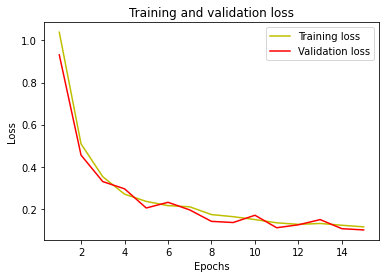

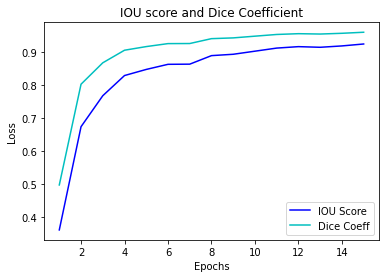

time: 286 ms (started: 2022-07-06 08:13:22 +00:00)


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
iou = history.history['iou_score']
# dice_loss= history.history['dice_loss']
dice_coef= history.history['dice_coef']



epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, iou, 'b', label='IOU Score')
# plt.plot(epochs, dice_loss, 'r', label='Dice Loss')
plt.plot(epochs, dice_coef, 'c', label='Dice Coeff')
plt.title('IOU score and Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# np.min(history.history['val_loss'])

time: 533 µs (started: 2022-07-06 08:13:22 +00:00)


In [ ]:
model.save('/content/Dataset/lesion_segm_model.h5')

time: 148 ms (started: 2022-07-06 08:13:22 +00:00)


Testing for same dataset

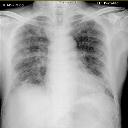

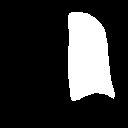

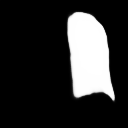

time: 650 ms (started: 2022-07-06 08:13:23 +00:00)


In [ ]:

test_img = ll_images_np[10]    
# test_img = cv2.resize(test_img, (128, 128))
# test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

ground = ll_masks_np[10]
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground*255)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)

(128, 128, 3)
(128, 128)


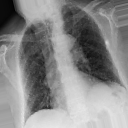

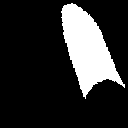

time: 149 ms (started: 2022-07-06 08:16:30 +00:00)


In [ ]:

# convert to unsigned integers for plotting
image = next(image_generator)[0].astype('uint8')
mask = next(mask_generator)[0].astype('uint8')

# changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
image = np.squeeze(image)
mask = np.squeeze(mask)
print(image.shape)
print(mask.shape)

# plot raw pixel data
cv2_imshow(image)
cv2_imshow(mask*255)
# np.unique(image)

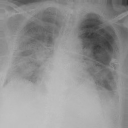

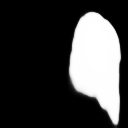

time: 2.43 s (started: 2022-07-06 08:17:31 +00:00)


In [ ]:
temp = []
t=[]
for i in range(0,5):
  img = next(train_generator)[0].astype('uint8')
  img = np.squeeze(img)
  img_l = img[0,:,:,:]

  msk = model.predict(img)
  msk = np.squeeze(msk)
  msk_l = msk[0,:,:]
  # cv2.imwrite()
  temp.append(img_l)
  t.append(msk_l)
cv2_imshow(temp[0])
cv2_imshow(t[0]*255)

In [ ]:
# x = temp[0]
# result = x[0, :, :, :]
# cv2_imshow(result)

In [ ]:
y = t[0]
y.shape

In [ ]:
x =77
test_img = ll_images_np[x]
# test_img = cv2.resize(test_img, (128, 128))
# test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

ground = ll_masks_np[x]
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground*255)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)

In [ ]:
x =5
test_img = ll_images_np[x]
# test_img = cv2.resize(test_img, (128, 128))
# test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

ground = ll_masks_np[x]
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground*255)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)

Testing for image from different dataset

In [ ]:
path1 = "/content/og.png"
path2 = "/content/left_mask.png"
test_img = cv2.imread(path1)
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)


ground = cv2.imread(path2)
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)

In [ ]:
i=11

path1 = "/content/og1.png"
path2 = "/content/left_mask1.png"
test_img = cv2.imread(path1)      
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

ground = cv2.imread(path2)
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)

In [ ]:
i=11

path1 = "/content/img.png"
path2 = "/content/msk.png"
test_img = cv2.imread(path1)      
test_img = cv2.resize(test_img, (128, 128))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
cv2_imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

ground = cv2.imread(path2)
ground = cv2.resize(ground, (128, 128))
cv2_imshow(ground)

prediction = model.predict(test_img)
prediction_image = prediction.reshape((128,128))
cv2_imshow(prediction_image*255)

# fin = cv2.hconcat([test_img, ground, prediction_image])
# cv2_imshow(fin)